<a href="https://colab.research.google.com/github/dyahajengp/Pemrograman-Python/blob/main/cnn11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [79]:
ls

 cnn11.ipynb  'Salinan dari Salinan dari scenes_nn_4 layers.ipynb'
 dataset@     'Salinan dari scenes_nn_4 layers (1).ipynb'
 datasett/    'Salinan dari scenes_nn_4 layers.ipynb'
 datasettt/


In [80]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [81]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("datasett")
data = []
labels = []

[INFO] loading images...


In [82]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [83]:
print(labels)

['nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB', 'nonGMB',

In [84]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [85]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


In [86]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(425, 128, 128, 3)
(142, 128, 128, 3)


In [91]:
from keras.layers import Convolution2D, MaxPool2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 126, 126, 8)       224       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 63, 63, 8)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 61, 61, 16)        1168      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 30, 30, 16)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 14400)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               1440100   
_________________________________________________________________
dense_17 (Dense)             (None, 5)                

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(32*32*5,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

In [92]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [93]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 20ms/step - loss: 1.7941 - accuracy: 0.2729 - val_loss: 1.5947 - val_accuracy: 0.3451
Epoch 2/25
14/14 [==============================] - 0s 12ms/step - loss: 1.4158 - accuracy: 0.4847 - val_loss: 1.3172 - val_accuracy: 0.5070
Epoch 3/25
14/14 [==============================] - 0s 11ms/step - loss: 1.1484 - accuracy: 0.5953 - val_loss: 1.1017 - val_accuracy: 0.5704
Epoch 4/25
14/14 [==============================] - 0s 11ms/step - loss: 0.8668 - accuracy: 0.7129 - val_loss: 0.8315 - val_accuracy: 0.7254
Epoch 5/25
14/14 [==============================] - 0s 11ms/step - loss: 0.6746 - accuracy: 0.7671 - val_loss: 0.6765 - val_accuracy: 0.7183
Epoch 6/25
14/14 [==============================] - 0s 10ms/step - loss: 0.5419 - accuracy: 0.7953 - val_loss: 0.5811 - val_accuracy: 0.8169
Epoch 7/25
14/14 [==============================] - 0s 10ms/step - loss: 0.4331 - accuracy: 0.8400 - val_loss: 0.4777 - val_accuracy: 0.7958
Epoch 8/25
14

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


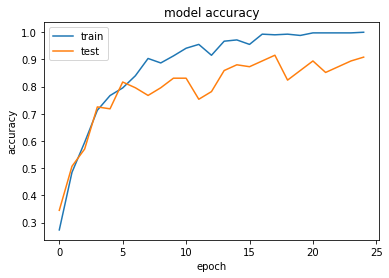

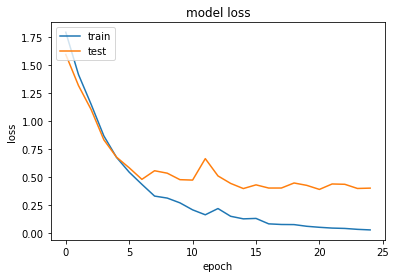

In [95]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.93      0.84      0.89        32
      GMB_02       0.81      0.81      0.81        27
      GMB_08       0.92      0.92      0.92        26
      GMB_09       0.97      1.00      0.98        30
      nonGMB       0.90      0.96      0.93        27

    accuracy                           0.91       142
   macro avg       0.91      0.91      0.91       142
weighted avg       0.91      0.91      0.91       142



In [98]:
model1.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [99]:
import cv2
import matplotlib.pyplot as plt
image1='daun.jpg'

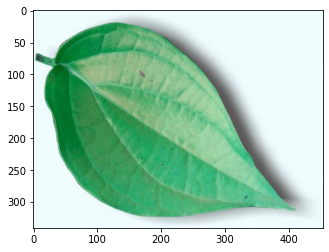

In [100]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [101]:
image_testing = Image.open('daun.jpg')
image_testing = np.array(image_testing.resize((128, 128))) / 255.0
image_testing.shape

(128, 128, 3)

In [102]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 128, 128, 3)


In [104]:
output = model1.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[9.7960979e-01 2.5945404e-04 6.7307876e-04 1.9380815e-02 7.6818389e-05]]
['GMB_01']
